In [2]:
%run -m check_db database

File number mismatch: 3201 files in the index, 3107 files on disk
3107 unique files in the index, 3107 unique files on disk

database\data-nk\main\Hg\Inagaki.yml appears 3 times in the index
database\data-nk\main\SiO2\Malitson.yml appears 3 times in the index
database\data-nk\organic\C3H8O3 - glycerol\Gupta.yml appears 3 times in the index
database\data-nk\glass\schott\N-BK7.yml appears 3 times in the index
database\data-nk\glass\schott\N-BAF10.yml appears 3 times in the index
database\data-nk\main\Ag\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\Al\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\Au\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\C\Phillip.yml appears 2 times in the index
database\data-nk\main\C\Taylor.yml appears 2 times in the index
database\data-nk\main\NaCl\Li.yml appears 2 times in the index
database\data-nk\main\Cu\Rakic-BB.yml appears 2 times in the index
database\data-nk\main\Fe\Johnson.yml appears 2 times in th

In [3]:
from ldbb import LDBB
from reflectance import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
lambda_min = 10      # nm
lambda_max = 1200    # nm
delta_lambda = 1
incident_angle = 0  # degree

visible_min = 360    # nm
visible_max = 830    # nm

# Available options: 'Ag', 'Au', 'Cu', 'Al', 'Be', 'Cr', 'Ni', 'Pd', 'Pt', 'Ti', 'W'
material = 'Al'

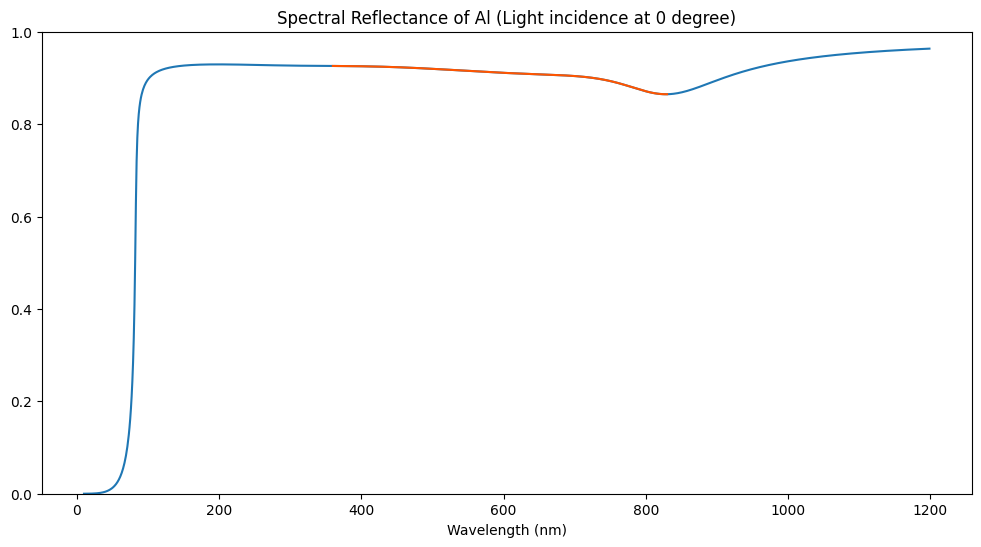

In [5]:
lambdas = np.arange(lambda_min, lambda_max, delta_lambda)
idxMat = np.sqrt(LDBB(material,'LD', lambdas * 1e-9))
idxEnv = np.repeat(1, len(idxMat))
refl = spectral_reflectance(idxMat, idxEnv, incident_angle)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title(f"Spectral Reflectance of {material} (Light incidence at {incident_angle} degree)")
ax.set_xlabel("Wavelength (nm)")
ax.set_ylim(0, 1)
ax.plot(lambdas, refl)

min_idx = int((visible_min - lambda_min) / delta_lambda)
max_idx = int((visible_max - lambda_min) / delta_lambda)
ax.plot(lambdas[min_idx:max_idx+1], refl[min_idx:max_idx+1], color='#FF5500')

In [6]:
file = f"out/{material}_inc{incident_angle}.csv"
df = np.transpose(np.vstack((lambdas[min_idx:max_idx+1], refl[min_idx:max_idx+1])))
np.savetxt(file, df, fmt="%d, %.18f", comments="")

In [17]:
idxPVC = np.array([
 1.56135 + 2.72e-06j,
 1.55983 + 2.35e-06j,
 1.55812 + 2.16e-06j,
 1.55625 + 1.96e-06j,
 1.55491 + 1.82e-06j,
 1.55388 + 1.71e-06j,
 1.55236 + 1.64e-06j,
 1.55145 + 1.60e-06j,
 1.55010 + 1.58e-06j,
 1.54940 + 1.61e-06j,
 1.54850 + 1.67e-06j,
 1.54761 + 1.75e-06j,
 1.54692 + 1.83e-06j,
 1.54626 + 1.96e-06j,
 1.54533 + 2.09e-06j,
 1.54493 + 2.17e-06j,
 1.54389 + 2.20e-06j,
 1.54325 + 2.27e-06j,
 1.54275 + 2.34e-06j,
 1.54238 + 2.30e-06j,
 1.54137 + 2.15e-06j,
 1.54114 + 2.00e-06j,
 1.54073 + 1.90e-06j,
 1.54004 + 1.80e-06j,
 1.53987 + 1.68e-06j,
 1.53987 + 1.54e-06j,
 1.53946 + 1.44e-06j,
 1.53880 + 1.29e-06j,
 1.53812 + 1.14e-06j,
 1.53791 + 1.01e-06j,
 1.53754 + 8.96e-07j,
 1.53727 + 8.02e-07j,
 1.53732 + 7.67e-07j,
 1.53674 + 7.15e-07j,
 1.53593 + 7.07e-07j,
 1.53544 + 7.06e-07j,
 1.53569 + 6.66e-07j,
 1.53528 + 6.60e-07j,
 1.53526 + 6.47e-07j,
 1.53468 + 6.13e-07j,
 1.53569 + 6.16e-07j,
 1.53552 + 6.26e-07j,
 1.53471 + 5.30e-07j,
 1.53519 + 5.22e-07j
])
idxEnvPVC = np.repeat(1, len(idxPVC))
pvc_inc = 45

refl_pvc = spectral_reflectance(idxPVC, idxEnvPVC, pvc_inc)
lambdasPVC = np.arange(400, 840, 10)

filePVC = f"out/PVC_inc{pvc_inc}.csv"
dfPVC = np.transpose(np.vstack((lambdasPVC, refl_pvc)))
np.savetxt(filePVC, dfPVC, fmt="%d, %.18f", comments="")

In [18]:
filePVC_t = f"out/PVC_inc{pvc_inc}_t.csv"
dfPVC_t = np.transpose(np.vstack((lambdasPVC, 1 - refl_pvc)))
np.savetxt(filePVC_t, dfPVC_t, fmt="%d, %.18f", comments="")